In [22]:
import numpy as np
import matplotlib.pyplot as plt

# إعداد الزمن
time = np.arange(0, 141, 1)

# مكونات السلسلة الزمنية
trend = 0.5 * time  # الاتجاه: خط تصاعدي
seasonality = 10 * np.sin(2 * np.pi * time / 30)  # الموسمية: نمط متكرر
noise = np.random.normal(0, 5, size=len(time))  # الضوضاء: تغييرات عشوائية

print(trend)
print(seasonality)
print(noise)



[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50.  50.5 51.  51.5 52.  52.5 53.  53.5 54.  54.5 55.  55.5
 56.  56.5 57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  61.5 62.  62.5
 63.  63.5 64.  64.5 65.  65.5 66.  66.5 67.  67.5 68.  68.5 69.  69.5
 70. ]
[ 0.00000000e+00  2.07911691e+00  4.06736643e+00  5.87785252e+00
  7.43144825e+00  8.66025404e+00  9.51056516e+00  9.94521895e+00
  9.94521895e+00  9.51056516e+00  8.66025404e+00  7.43144825e+00
  5.87785252e+00  4.06736643e+00  2.07911691e+00  5.66553890e-15
 -2.07911691e+00 -4.067

In [23]:
# السلسلة الزمنية الكلية
ts1 = trend + seasonality + noise
print(ts1)

[ 5.49433859  1.90964437 -0.57826863  7.40384947 10.45718578 11.94266798
 24.57181676 15.22832151 16.49132314 14.69548104 12.17063962 12.51987833
  4.31918499 18.09768025 14.92459271  4.34553079 10.31449656  1.44799678
  0.76130011 -5.56773223 -3.55876428  3.4907399  -4.56827727  5.2795072
 -1.65948352 -1.33554923 -2.1870829   3.92965676 12.21703086  3.1054231
 18.43302406 15.52101906 13.0299706  29.84070064 20.48731375 14.95137517
 31.1877779  27.67201423 31.90421412 26.47101925 29.90465755 35.3989447
 25.30090731 21.5969513  28.69905549 31.2640684  17.40993859 20.95815657
 16.76783677 14.26102867 19.07774832 14.85826786 14.4756157   8.02086445
 21.06280717 17.12245812 11.43341486 19.6716786  28.28693515 30.97950949
 36.83234477 42.20918916 31.57236008 31.29206424 35.17952942 35.98562413
 42.07944906 44.53882073 38.94366435 37.63240742 59.06331358 43.99290262
 38.70921244 49.31441964 28.99697154 34.56322586 34.51711086 34.16131505
 28.91051485 24.34457579 24.75726127 34.95797871 37.62

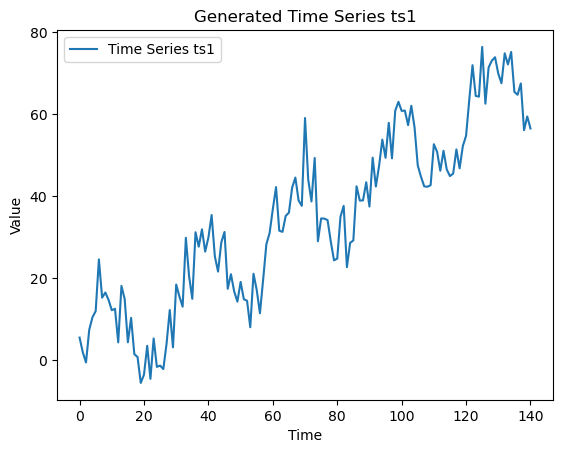

In [25]:
plt.plot(time, ts1, label="Time Series ts1")
plt.title("Generated Time Series ts1")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

------

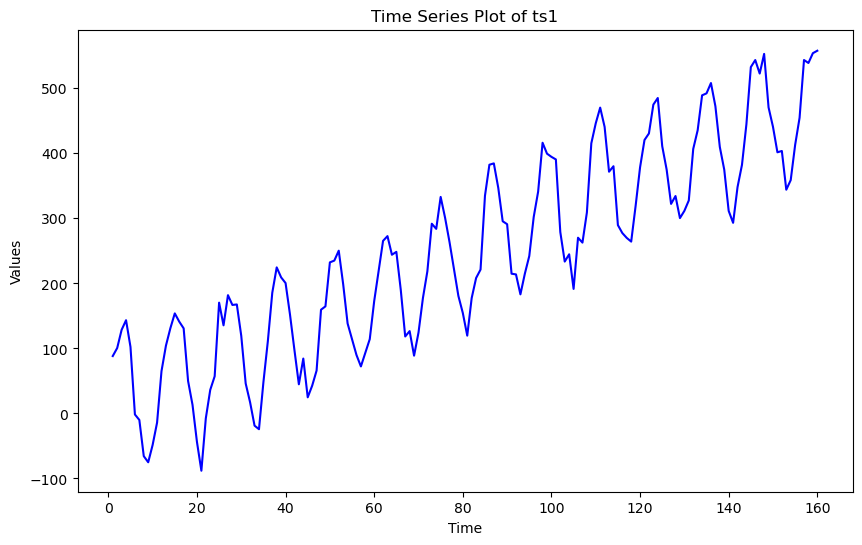

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulating a time series similar to the one in the image
np.random.seed(0)
time = np.arange(1, 161)
trend = time * 3
seasonality = 100 * np.sin(2 * np.pi * time / 12)
noise = np.random.normal(scale=20, size=160)
ts1 = trend + seasonality + noise

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(time, ts1, color='blue')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot of ts1')
plt.show()


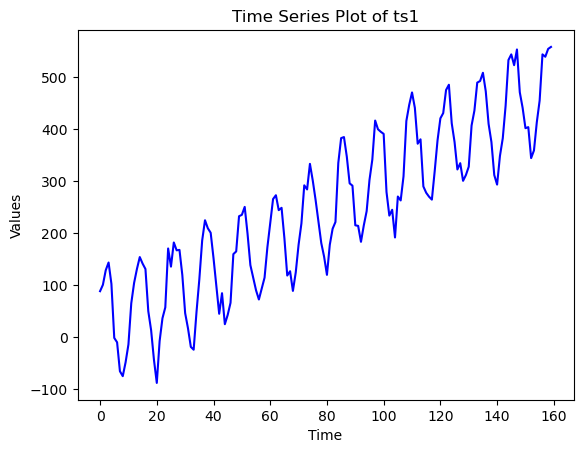

In [27]:
plt.plot(ts1, color='blue')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Plot of ts1')
plt.show()

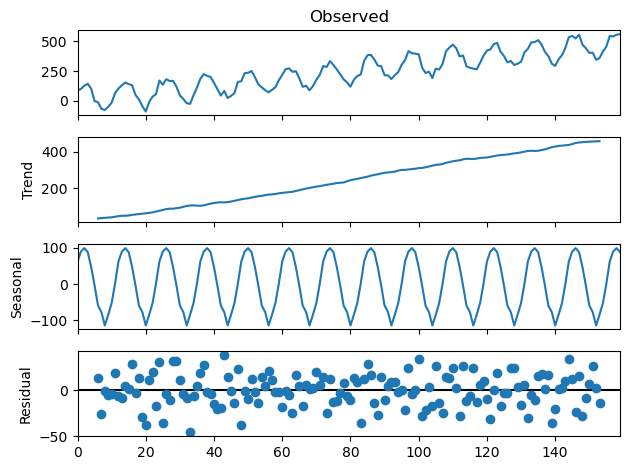

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1, model='additive', period=12)
decomposition.plot()
plt.show()

In [29]:
ts1_diff = ts1.diff().dropna()
plt.plot(ts1_diff)
plt.title('First-order Differenced Series')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'diff'

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts1, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=51)

plt.plot(ts1, label='Original')
plt.plot(range(150, 201), forecast, label='Forecast', color='red')
plt.legend()
plt.show()